# Bibliotecas

In [2]:
import sys

sys.path.append('/eos/user/t/thenriqu/Dark_Matter/LGBM_hhdm_analysis/')

import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import hepherolib.analysis as ana

from lgbm.controllers_lgb_v2 import LGBLearner, LGBModel
from lgbm.utils import model_performance, compute_purity_cutflow, compute_best_thr
from hhdm_analysis.utils import position, signal_label

ana.start()
plt.style.use("default")

# Configuração

In [3]:
period = 'APV_16'
year_style = 2016
dataset_year = "APV_2016"
basedir = '/eos/user/t/thenriqu/Dark_Matter/Amostras/hhdmAnalysis_deepJet_Regions/datasets'

# Setup figure folders
dataset_name = basedir.split('/')[-2]
figures_path = f"./figures/{dataset_name}/{dataset_year}/machine_learning"
Path(figures_path).mkdir(parents=True, exist_ok=True)

# Data folder
data_path = f"./data/{dataset_name}/{dataset_year}"
Path(data_path).mkdir(parents=True, exist_ok=True)

# Setup models folders
models_path = f"./models/{dataset_name}/{dataset_year}"
Path(models_path).mkdir(parents=True, exist_ok=True)

# Lendo Metadata

In [4]:
with open('/eos/user/t/thenriqu/Dark_Matter/metadata.json', 'r') as f:
    metadata = json.load(f)

# Lendo Dados e Modelo

In [5]:
model_name = 'LGB_multi_signal'
plot_label = 'Multi-signal'

# Train and Test data
X_train = pd.read_csv(f'{data_path}/{model_name}-train-data.csv')
X_test = pd.read_csv(f'{data_path}/{model_name}-test-data.csv')

W_train = X_train.pop('modelWeight').values
W_test = X_test.pop('modelWeight').values

Y_train = X_train.pop('Label').values
Y_test = X_test.pop('Label').values

evtWeight_train = X_train.pop('evtWeight').values
evtWeight_teste = X_test.pop('evtWeight').values

# Model
features = ["LeadingLep_pt", "LepLep_deltaM", "LepLep_deltaR", "LepLep_pt", "MET_LepLep_Mt", "MET_LepLep_deltaPhi", "MET_pt", "MT2LL", "Nbjets", "TrailingLep_pt"]
# model_path = f"{models_path}/{model_name}-clf.model"
# model = LGBModel(model_fpath=model_path)
model = LGBModel(model_fpath=f"{models_path}/{model_name}-clf.model")

# Predict do Treino e Teste

In [6]:
# Train
Y_pred_train = model.predict(X_train[features], features)
perf_train = model_performance(Y_train, Y_pred_train, n=1000)
ppv_train_cutflow = compute_purity_cutflow(perf_train.threshold, perf_train.fpr, perf_train.tpr, perf_train.ppv, perf_train.acc)
best_train_thr = compute_best_thr(perf_train.threshold, perf_train.tpr, perf_train.ppv)
ppv_train_cutflow.to_csv(f'{models_path}/{model_name}-ppv-train-cutflow.csv', index=False)


# Test
Y_pred_test = model.predict(X_test[features], features)
perf_test = model_performance(Y_test, Y_pred_test, n=1000)
ppv_test_cutflow = compute_purity_cutflow(perf_test.threshold, perf_test.fpr, perf_test.tpr, perf_test.ppv, perf_test.acc)
best_test_thr = compute_best_thr(perf_test.threshold, perf_test.tpr, perf_test.ppv)
ppv_test_cutflow.to_csv(f'{models_path}/{model_name}-ppv-test-cutflow.csv', index=False)

In [7]:
print('Best thr train:', best_train_thr)
display(ppv_train_cutflow)

Best thr train: 0.9819819819819819


,purity_cut,purity,threshold,efficiency,bkg_rejection,accuracy
0,0.100000,0.111412,0.000000,1.000000,0.169398,0.247739
1,0.200000,0.200629,0.094094,0.999423,0.585305,0.624364
2,0.300000,0.300181,0.249249,0.993401,0.758814,0.780940
3,0.400000,0.400270,0.461461,0.978650,0.847294,0.859684
4,0.500000,0.500058,0.693694,0.953438,0.900730,0.905702
5,0.600000,0.600663,0.881882,0.913712,0.936738,0.934566
6,0.700000,0.700317,0.970971,0.853450,0.961966,0.951731
7,0.800000,0.806062,0.994995,0.710259,0.982203,0.956554
8,0.900000,0.111412,0.000000,1.000000,0.169398,0.247739
9,0.730464,0.730464,0.981982,0.824717,0.968308,0.954765


In [8]:
print('Best thr test', best_test_thr)
display(ppv_test_cutflow)

Best thr test 0.980980980980981


,purity_cut,purity,threshold,efficiency,bkg_rejection,accuracy
0,0.100000,0.111249,0.000000,0.998447,0.169304,0.247510
1,0.200000,0.200455,0.098098,0.985673,0.590557,0.627825
2,0.300000,0.300215,0.262262,0.972728,0.763867,0.783567
3,0.400000,0.400173,0.478478,0.955984,0.850768,0.860692
4,0.500000,0.500240,0.711712,0.934305,0.902791,0.905764
5,0.600000,0.600546,0.885886,0.903960,0.937381,0.934229
6,0.700000,0.701638,0.971972,0.848932,0.962404,0.951702
7,0.800000,0.806863,0.994995,0.713467,0.982214,0.956866
8,0.900000,0.111249,0.000000,0.998447,0.169304,0.247510
9,0.727355,0.727355,0.980981,0.827493,0.967697,0.954472


# Notificar quando terminar o teste

In [9]:
from IPython.display import clear_output, display, HTML, Javascript

display(Javascript("""
  var msg = new SpeechSynthesisUtterance();
  msg.text = "Process completed!";
  window.speechSynthesis.speak(msg);
  alert("Process completed!")
"""))

<IPython.core.display.Javascript object>

# Preparando dados para o Plot do Discriminate

In [10]:
scale_factor = 10**6

X_train['LGB_score'] = Y_pred_train
X_test['LGB_score'] = Y_pred_test

X_train['modelWeight'] = W_train/scale_factor
X_test['modelWeight'] = W_test/scale_factor

X_train['Label'] = Y_train
X_test['Label'] = Y_test

X_train["evtWeight"] = evtWeight_train
X_test['evtWeight'] = evtWeight_teste

# Plot do Discriminate usando modelWeigth

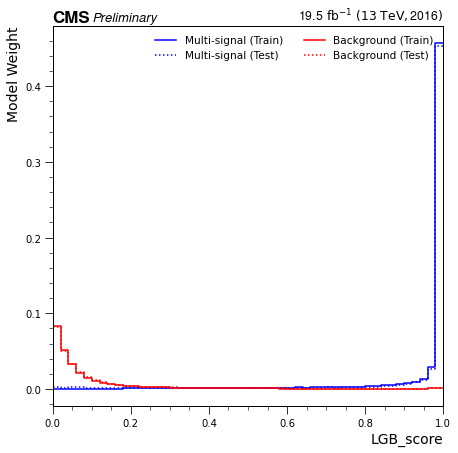

In [11]:
# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

ana.step_plot(ax1, "LGB_score", X_train[X_train.Label == 1], label=f"{plot_label} (Train)", color="blue", weight="modelWeight", bins=np.linspace(0, 1, 51))
ana.step_plot(ax1, "LGB_score", X_test[X_test.Label == 1], label=f"{plot_label} (Test)", color="blue", weight="modelWeight", bins=np.linspace(0, 1, 51), linestyle="dotted")
ana.step_plot(ax1, "LGB_score", X_train[X_train.Label == 0], label="Background (Train)", color="red", weight="modelWeight", bins=np.linspace(0, 1, 51))
ana.step_plot(ax1, "LGB_score", X_test[X_test.Label == 0], label="Background (Test)", color="red", weight="modelWeight", bins=np.linspace(0, 1, 51), linestyle="dotted")

ana.labels(ax1, ylabel="Model Weight", xlabel="LGB_score")
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=False, legend_ncol=2, #ylim=[0, 1]
)
plt.savefig(f"{figures_path}/LGB_score-modelWeight-{model_name}.png", dpi=200, facecolor='white')
plt.show()

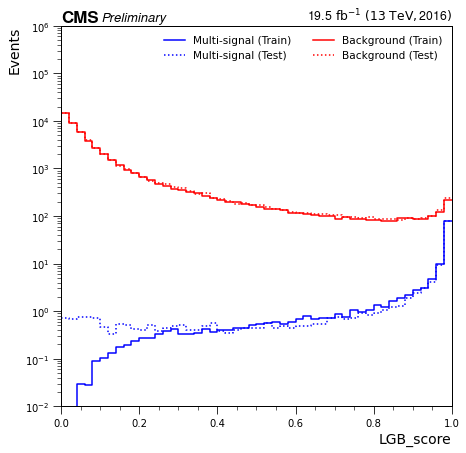

In [12]:
# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

ana.step_plot(ax1, "LGB_score", X_train[X_train.Label == 1], label=f"{plot_label} (Train)", color="blue", weight="evtWeight", bins=np.linspace(0, 1, 51))
ana.step_plot(ax1, "LGB_score", X_test[X_test.Label == 1], label=f"{plot_label} (Test)", color="blue", weight="evtWeight", bins=np.linspace(0, 1, 51), linestyle="dotted")
ana.step_plot(ax1, "LGB_score", X_train[X_train.Label == 0], label="Background (Train)", color="red", weight="evtWeight", bins=np.linspace(0, 1, 51))
ana.step_plot(ax1, "LGB_score", X_test[X_test.Label == 0], label="Background (Test)", color="red", weight="evtWeight", bins=np.linspace(0, 1, 51), linestyle="dotted")

ana.labels(ax1, ylabel="Events", xlabel="LGB_score")
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1e-2, 1e6]
)
plt.savefig(f"{figures_path}/LGB_score-evtWeight-{model_name}.png", dpi=200, facecolor='white')
plt.show()